In [110]:
#필요한 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# seaborn과 matplotlib는 시각화하기 위해서

In [111]:
df = pd.read_csv("./Data/diabetes.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [112]:
#모델 성능을 높이기위한 방법1 : Feature engineering
#수치형 데이터를 범주화하여 성능을 높임.

df['Pregnancies_high']=df['Pregnancies']>6
df[['Pregnancies','Pregnancies_high']].head()


,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [113]:
# 모델 성능 높이기 위한 방법2 : Feature Engineering
# 나이를 '25세 미만','25세부터 60세','60세'이상
df['Age_low'] = df['Age']<25
df['Age_middle'] = (df['Age']>=25) & (df['Age']<=60)
df['Age_high']=df['Age']>60
df[['Age','Age_low','Age_middle','Age_high']].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


In [114]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [115]:
df['Insulin_nan'] = df['Insulin'].replace(0,np.nan)
df[['Insulin_nan','Insulin']].head()

,Insulin_nan,Insulin
0,NaN,0
1,NaN,0
2,NaN,0
3,94.0,94
4,168.0,168


In [116]:
df['Insulin_nan'].isnull().sum()

374

In [117]:
#결측치의 비율확인
df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [118]:
df.groupby(['Outcome'])['Insulin','Insulin_nan'].agg(['mean','median'])
# 0 을 null값으로 처리했을때
# Outcome = 0 -> 인슐린의 평균값 = 130
# Outcome = 1 -> 인슐린의 평균값 = 206

<ipython-input-118-17b42f0d5f4e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Outcome'])['Insulin','Insulin_nan'].agg(['mean','median'])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [119]:
# 모델 성능을 높이기 위한 방법3
# 결측치 평균값으로 대체하기
df.loc[(df['Outcome']==0) &(df['Insulin_nan'].isnull()),'Insulin_nan'] = 130
df.loc[(df['Outcome']==1)&(df['Insulin_nan'].isnull()),'Insulin_nan'] = 206

In [120]:
#모델 성능을 높이기 위한 방법4
#결측치를 중앙값으로 대체하기

df.loc[(df['Outcome']==0)& (df['Insulin_nan'].isnull()),'Insulin_nan']=102.5
df.loc[(df['Outcome']==1)& (df['Insulin_nan'].isnull()),'Insulin_nan']=169.5

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

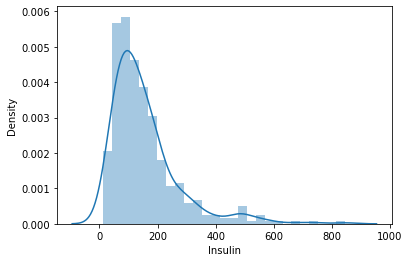

In [121]:
#모델 성능을 높이기 위한 방법 5
#데이터 분포를 정규 분포처럼 만들기 => log 사용

sns.distplot(df.loc[df['Insulin']>0,'Insulin'])

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin_nan', ylabel='Density'>

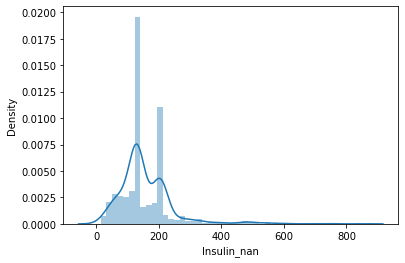

In [122]:
sns.distplot(df['Insulin_nan'])

### 왜도와 첨도

 + 왜도 : 데이터의 치우친 정도
 + 첨도 : 뾰족한 정도

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

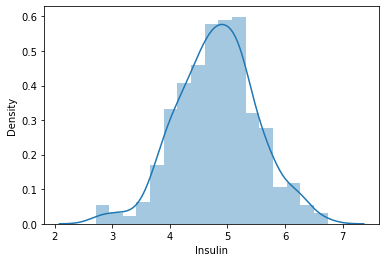

In [124]:
sns.distplot(np.log(df.loc[df['Insulin']>0,'Insulin']+1))
#log변환을 하면 데이터는 정규분포와 비슷한 모양을 띈다.

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin_log', ylabel='Density'>

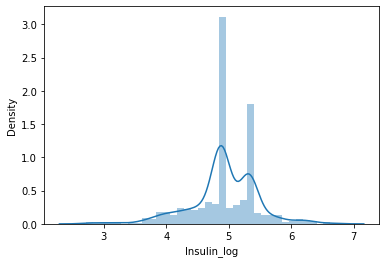

In [125]:
df['Insulin_log'] = np.log(df['Insulin_nan']+1)
sns.distplot(df['Insulin_log'])

### 학습, 예측 데이터셋 나누기

In [126]:
#행의 80%만 학습 세트로 만든다.
split_count  = int(df.shape[0] * 0.8)
split_count

614

In [127]:
train = df[:split_count].copy()
train.shape

(614, 15)

In [128]:
test = df[split_count:].copy()
test.shape

(154, 15)

### 학습,예측에 사용할 컬럼

In [130]:
feature_names = train.columns[:].tolist()
feature_names.remove('Outcome')
feature_names.remove('Pregnancies')
#Age를 범주화 했을 때 성능이 떨어졌기때문에 Age를 수치화한다.
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin_nan')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_log']

In [131]:
label_name = 'Outcome'
label_name

'Outcome'

### 학습, 예측 데이터 셋 만들기

In [132]:
#학습데이터셋
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 9)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_log
0,148,72,35,0,33.6,0.627,50,False,5.332719
1,85,66,29,0,26.6,0.351,31,False,4.875197
2,183,64,0,0,23.3,0.672,32,True,5.332719
3,89,66,23,94,28.1,0.167,21,False,4.553877
4,137,40,35,168,43.1,2.288,33,False,5.129899


In [133]:
Y_train = train[label_name]
print(Y_train.shape)
Y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [134]:
#테스트를 위한 데이터셋
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_log
614,138,74,26,144,36.1,0.557,50,True,4.976734
615,106,72,0,0,25.8,0.207,27,False,4.875197
616,117,96,0,0,28.7,0.157,30,False,4.875197
617,68,62,13,15,20.1,0.257,23,False,2.772589
618,112,82,24,0,28.2,1.282,50,True,5.332719


In [135]:
Y_test = test[label_name]
print(Y_test.shape)
Y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

### 머신러닝 알고리즘 가져오기

In [136]:
from sklearn.tree import DecisionTreeClassifier

model =  DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [137]:
# 훈련
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [138]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

### 트리 알고리즘 분석하기



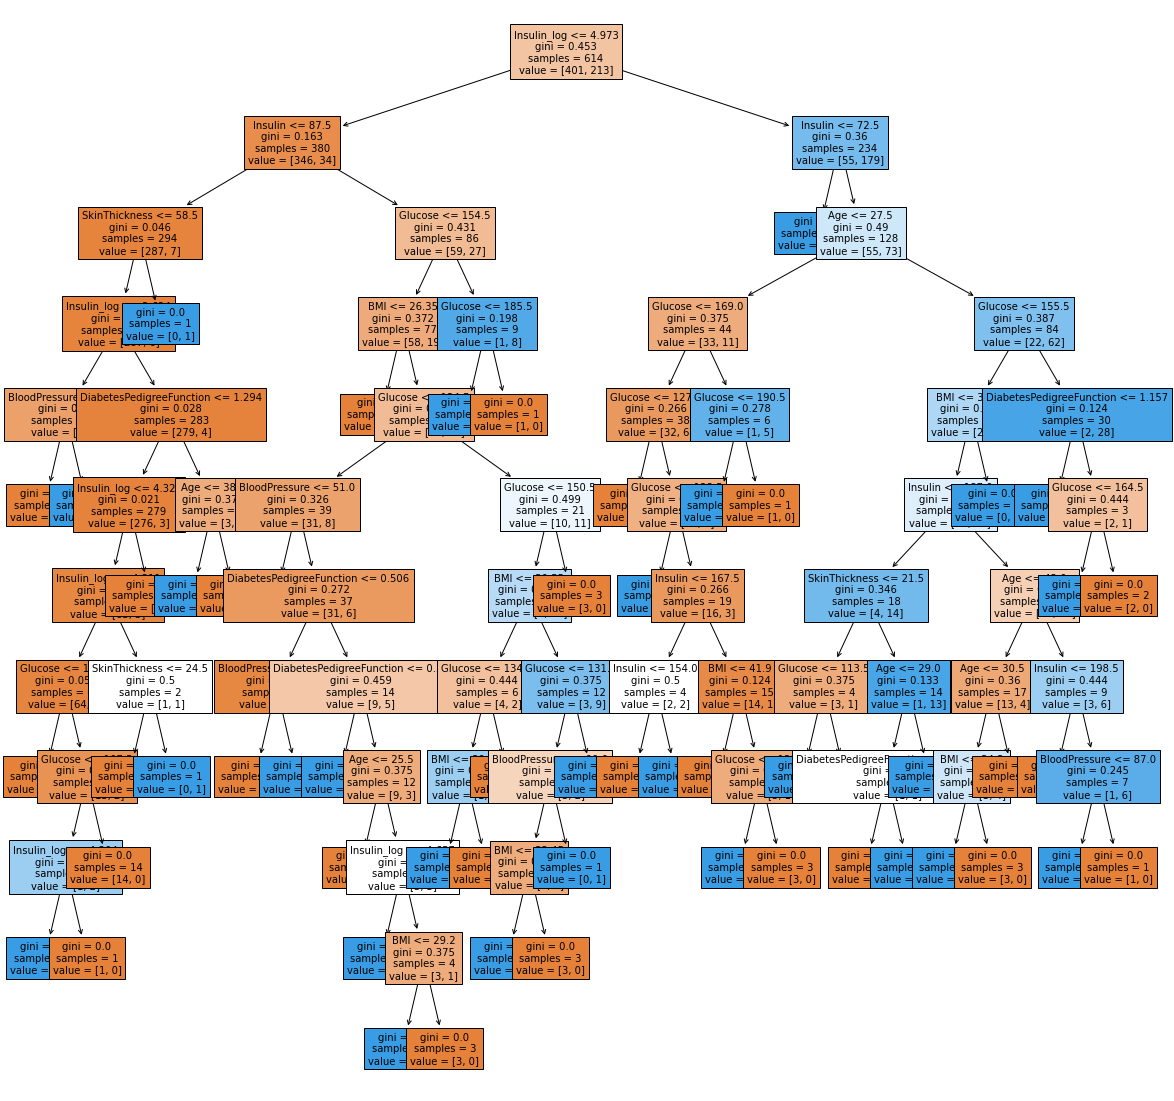

In [139]:
from sklearn.tree import plot_tree

#plot_tree(model,feature_names = feature_names)
#시각화하면
plt.figure(figsize = (20,20))
tree= plot_tree(model, feature_names= feature_names , filled = True,fontsize=10)

In [140]:
model.feature_importances_

array([0.13814141, 0.03734918, 0.020766  , 0.14870873, 0.05585965,
       0.02693013, 0.08085181, 0.        , 0.49139309])

<AxesSubplot:>

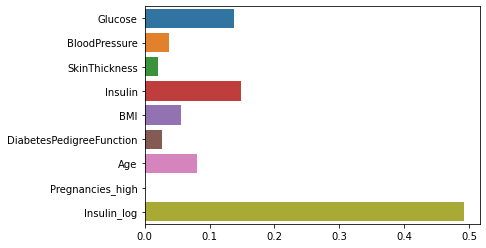

In [141]:
#중요도 수치 시각화
#인슐린안의 결측치를 평균값으로 바꾸었을때
# 인슐린의 중요도가 높아진 것을 확인할 수 있다.
sns.barplot(x=model.feature_importances_, y= feature_names)

In [142]:
#이전과는 다르게 Pregnancies가 중요한 역할을 하지 않았다.

### 정확도 예측하기

In [143]:
#34(처음)->44(Pregnancies)-> 50(Age) -> 18(인슐린을 평균값으로 대체) 
# -> 16(인슐린을 중앙값으로 대체) => 18(데이터를 정규분포형태로 만듦.)
diff_count = abs(Y_test - y_predict).sum()
diff_count

18

In [144]:
abs(Y_test - y_predict).sum()/len(Y_test) * 100

11.688311688311687

In [145]:
# 사이킷런의 accuracy 메트릭 사용
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_predict)

0.8831168831168831

In [146]:
model.score(X_test,Y_test)*100

88.31168831168831

- feature engineering :데이터에 대한 지식을 활용하여 특징을 만들어내는 과정
- 연속 수치 데이터를 범주형 변수로 변경한다.

- 정확도가 feature engineering 한것보다 더 떨어졌다.

가정 : 임신횟수가 많아 질 수록 데이터셋의 크기가 작아 오버피팅할 가능성이 높다.
       Pregnancies를 6을 기준으로해 boolean값을 만들어주서 오버피팅의 가능성을 낮춘다.
       
       -> feature engineering을 한다고 해서 항상 성능이 좋아지는 것은 아니다.
       -> 다양한 방법을 시도해 보아야한다.

 Age를 범주형으로 바꾸었을때 정확도는 떨어졌다.
 ->feature engineering을 한다고 해서 항상 모델의 성능이 좋아지지 않는다.

Insulin의 결측치에 Outcome을 기준으로 인슐린의 평균을 넣어주었다. -> 모델의 정확도 상승

인슐린의 결측치에 Outcome을 기준으로 인슐린의 중앙값을 넣어주었다 => 모델의 정확도 상승

 + 인슐린 수치를 나이 또는 발병 여부에 맞춰 채워넣을 수도 있다
 + 결측치를 제거할 수도 있지만 결측치가 많을 경우 채워주는 것이 좋다.

인슐린의 데이터를 정규분포 형태로 만들었다 => 모델의 성능 하락
 + np.log를 취하면 대부분의 데이터는 정규분포 형태를 띈다.
 + 데이터를 정규분포 형태로 만들어주면 머신러닝, 딥러닝 알고리즘은 더 좋은 성능을 띈다.
 + 여기선 아님.